In [24]:
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import squarify 
from collections import Counter
from wordcloud import WordCloud

In [25]:
# Read the dataset
data = pd.read_csv('/Users/emmasun/Desktop/2470 final project/data/mbti_1.csv') 
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## EDA

In [26]:
# DATASET

In [27]:
data_EDA = data.copy()

In [28]:
data_EDA.shape

(8675, 2)

In [29]:
data_EDA.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [30]:
data_EDA.isnull().any()

type     False
posts    False
dtype: bool

In [31]:
# Y (MBTI)

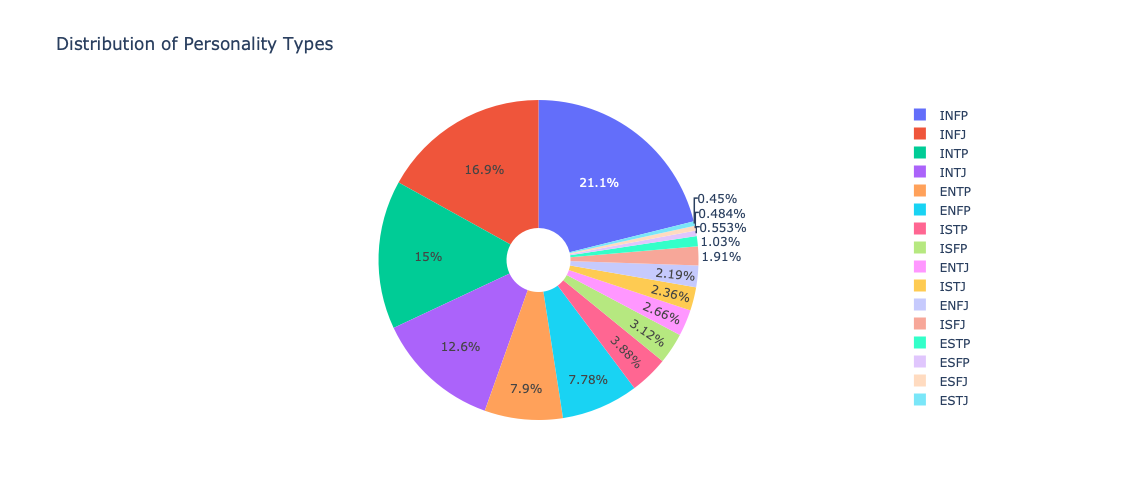

In [32]:
# plot pieplot

import plotly.express as px

# Assuming data_EDA is your DataFrame containing the data
# Replace 'type' with the actual column name containing personality types
fig = px.pie(data_EDA, names='type', title='Distribution of Personality Types', hole=0.2)
fig.update_layout(height=500, width=700)  # Adjust the height and width as needed for compactness
fig.show()



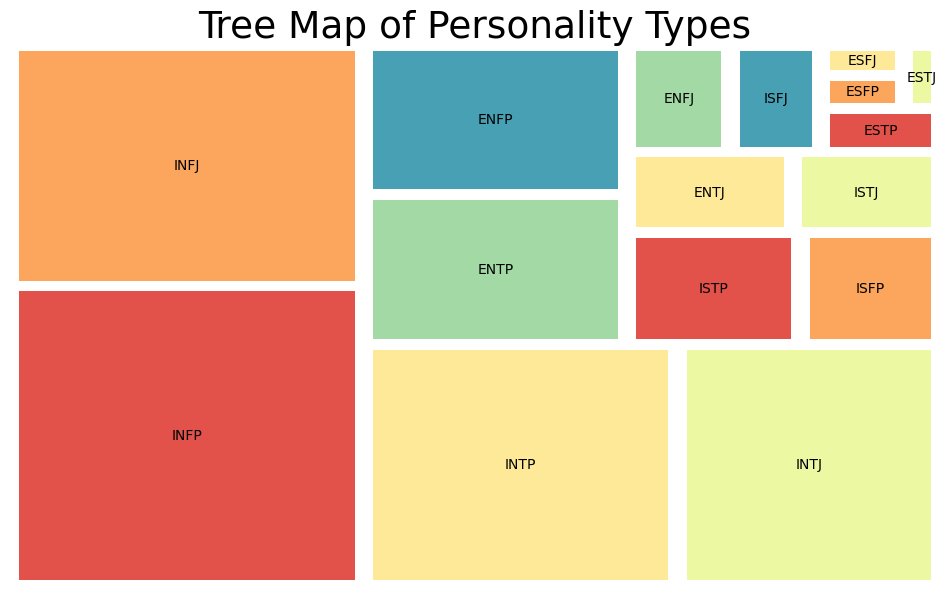

In [33]:
# Plot tree map
count = dict(data_EDA['type'].value_counts())
plt.figure(figsize=(12,7))
squarify.plot(sizes=count.values(), color=sns.color_palette("Spectral"), pad=2, label=count.keys())
plt.title('Tree Map of Personality Types', fontsize=27)
plt.axis('off')
plt.show()

In [34]:
# 4 pairs (Y, MBTI)

In [35]:
# add columns for pair
def get_types(row):
    t=row['type']
    I = 0; N = 0
    T = 0; J = 0
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found')
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J })
data_EDA_4pair = data_EDA.join(data_EDA.apply (lambda row: get_types (row),axis=1))
data_EDA_4pair.head(10)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...,1,1,1,1
6,INFJ,"'No, I can't draw on my own nails (haha). Thos...",1,1,0,1
7,INTJ,'I tend to build up a collection of things on ...,1,1,1,1
8,INFJ,"I'm not sure, that's a good question. The dist...",1,1,0,1
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...,1,1,1,0


In [36]:
#Count Number posts in one pair | Total Number posts in other pair
print ("Introversion (I) |  Extroversion (E): \t", data_EDA_4pair['IE'].value_counts()[0], " | ", data_EDA_4pair['IE'].value_counts()[1])
print ("Intuition    (N) |  Sensing      (S): \t", data_EDA_4pair['NS'].value_counts()[0], " | ", data_EDA_4pair['NS'].value_counts()[1])
print ("Thinking     (T) |  Feeling      (F): \t", data_EDA_4pair['TF'].value_counts()[0], " | ", data_EDA_4pair['TF'].value_counts()[1])
print ("Judging      (J) |  Perceiving   (P): \t", data_EDA_4pair['JP'].value_counts()[0], " | ", data_EDA_4pair['JP'].value_counts()[1])

Introversion (I) |  Extroversion (E): 	 1999  |  6676
Intuition    (N) |  Sensing      (S): 	 1197  |  7478
Thinking     (T) |  Feeling      (F): 	 4694  |  3981
Judging      (J) |  Perceiving   (P): 	 5241  |  3434


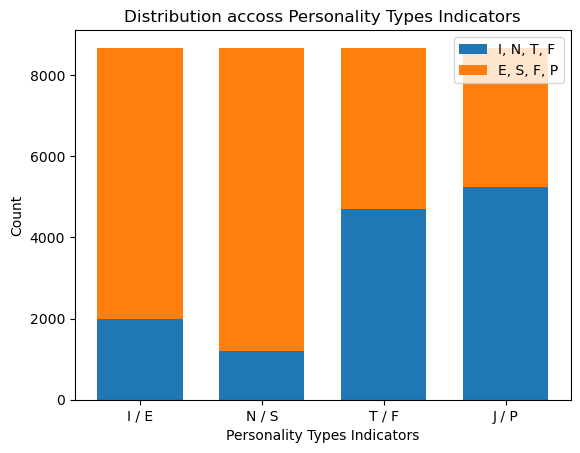

In [37]:
#Plot barplot for 4 pairs
N = 4
bottom = (data_EDA_4pair['IE'].value_counts()[0], data_EDA_4pair['NS'].value_counts()[0], data_EDA_4pair['TF'].value_counts()[0], data_EDA_4pair['JP'].value_counts()[0])
top = (data_EDA_4pair['IE'].value_counts()[1], data_EDA_4pair['NS'].value_counts()[1], data_EDA_4pair['TF'].value_counts()[1], data_EDA_4pair['JP'].value_counts()[1])
ind = np.arange(N)
width = 0.7
p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P")
plt.title('Distribution accoss Personality Types Indicators')
plt.xlabel('Personality Types Indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()
plt.show()


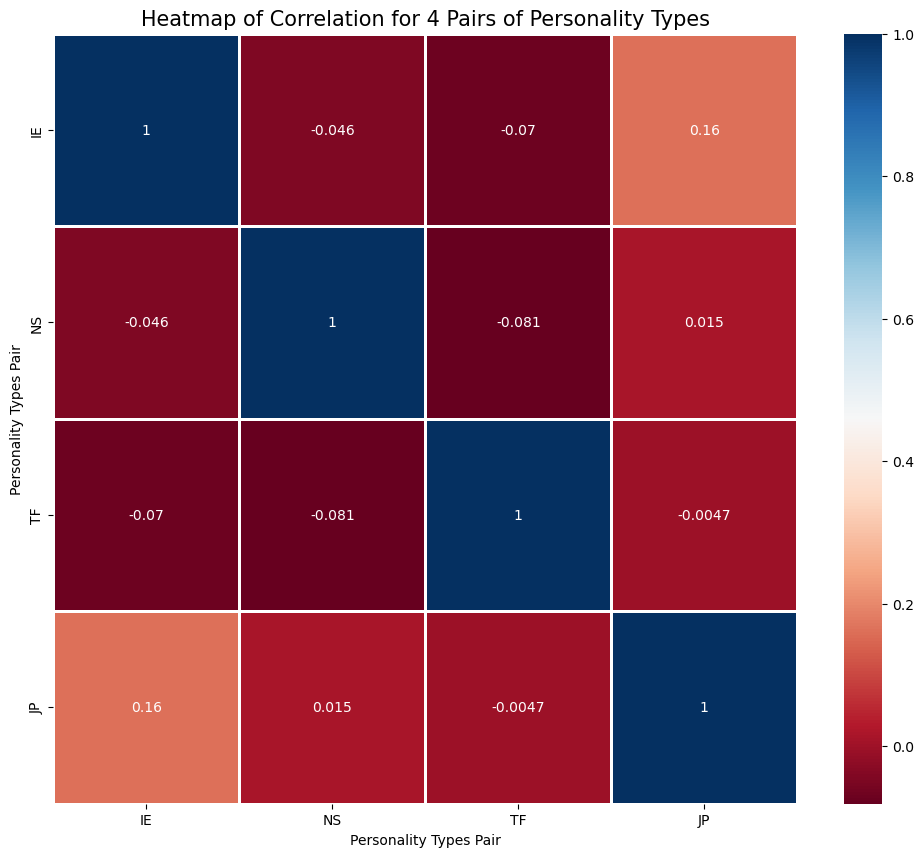

In [38]:
#Plot heatmap for correlation of 4 pairs
cmap = plt.cm.RdBu
corr = data_EDA_4pair[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Heatmap of Correlation for 4 Pairs of Personality Types', size=15)
sns.heatmap(corr, cmap=cmap, annot=True, linewidths=1)
plt.xlabel('Personality Types Pair')
plt.ylabel('Personality Types Pair')
plt.show()

In [39]:
# X (posts)

In [40]:
# Count total number of post for each MBTI type
total_post = data_EDA.groupby(['type']).count()*50
total_post

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total Post of Each Personality Type')

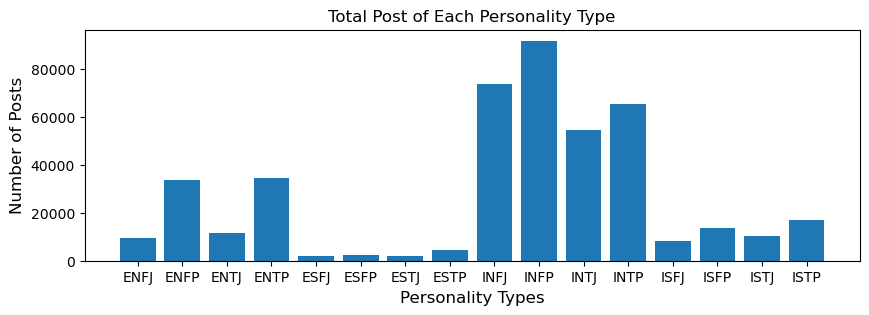

In [41]:
# Plot total number of post for each MBTI type
plt.figure(figsize = (10,3))
plt.bar(np.array(total_post.index), height = total_post['posts'],)
plt.xlabel('Personality Types', size = 12)
plt.ylabel('Number of Posts', size = 12)
plt.title('Total Post of Each Personality Type')

/var/folders/tc/v7ylhk8x7mdc1gjmb84lp1rh0000gn/T/ipykernel_3255/712164867.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




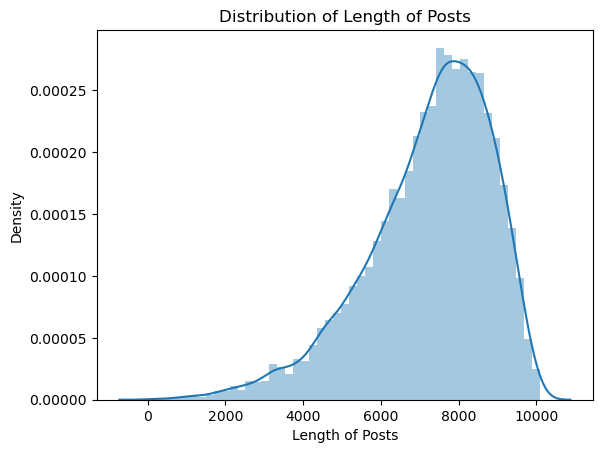

In [42]:
# Plot length of all posts
data_EDA["length_posts"] = data_EDA["posts"].apply(len)
sns.distplot(data_EDA["length_posts"]).set_title("Distribution of Length of Posts")
plt.xlabel("Length of Posts")
plt.show()

In [43]:
# Count the most common words in all posts
words = list(data_EDA["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

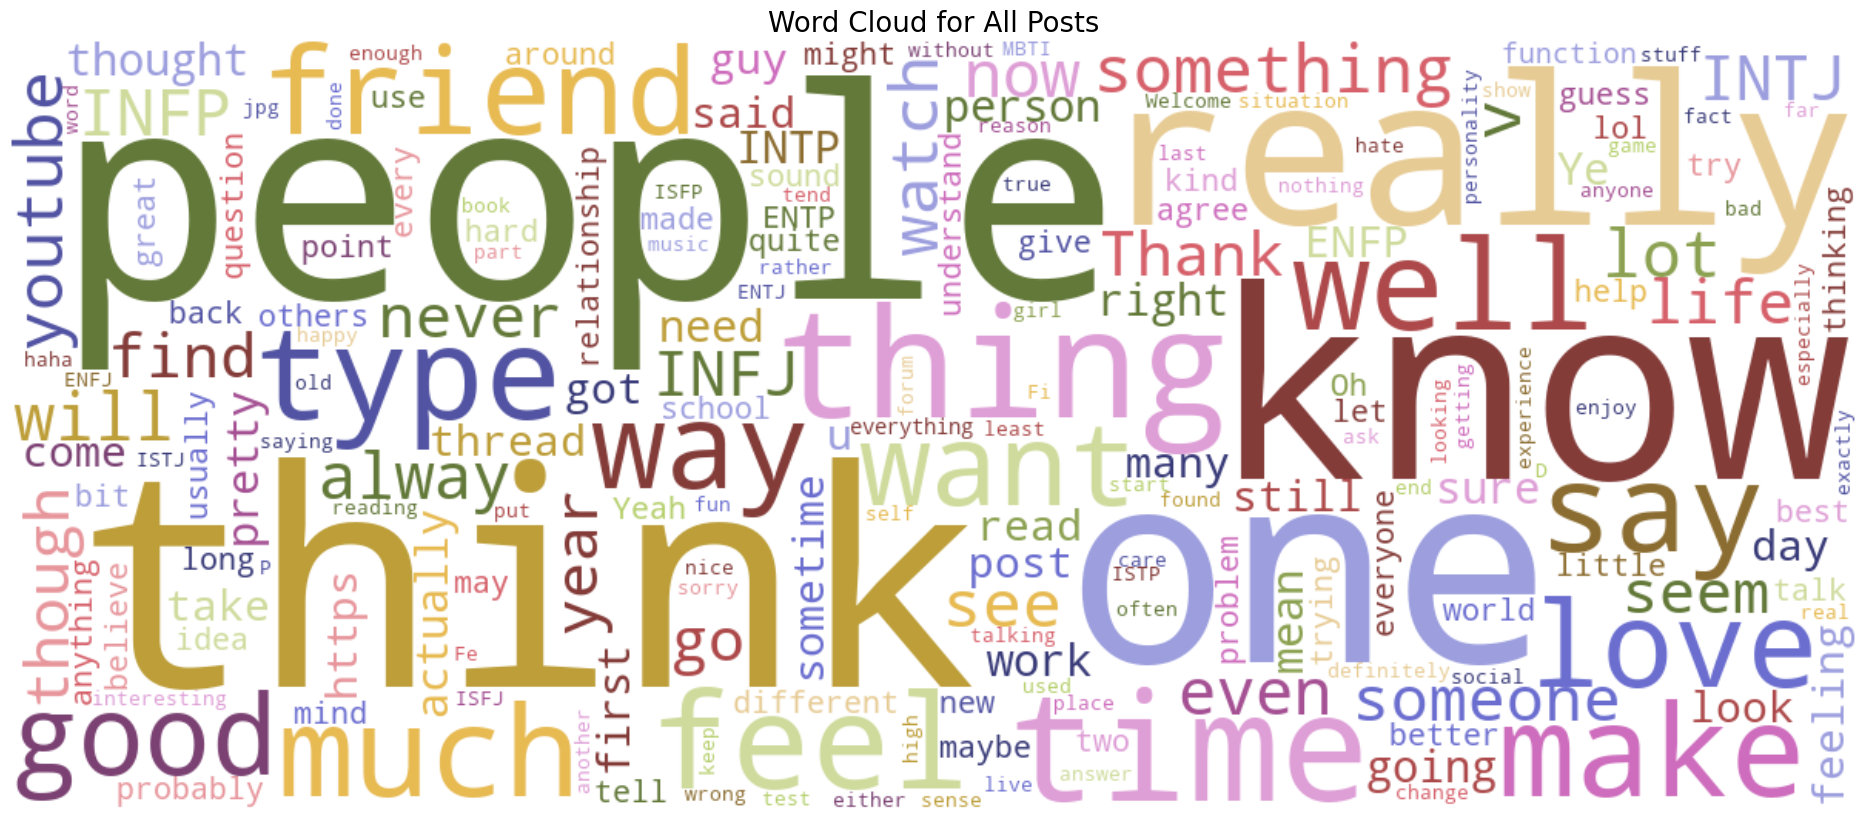

In [44]:
# plot wordcloud for all posts

# Assuming 'words' is a list of words you want to visualize
wc = WordCloud(width=1200, height=500, collocations=False, background_color="white", colormap="tab20b").generate(" ".join(words))

plt.figure(figsize=(25,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Add a title to the plot
plt.title("Word Cloud for All Posts", fontsize=20)  # Replace "Word Cloud Title" with your desired title

plt.show()


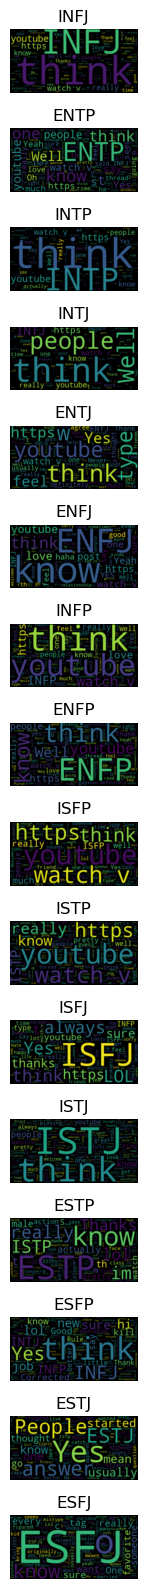

In [45]:
# plot wordcloud for all posts of each MBTI

# Create subplots
fig, ax = plt.subplots(len(data_EDA['type'].unique()), figsize=(15,len(data_EDA['type'].unique())))

k = 0
for i in data_EDA['type'].unique():
    df = data_EDA[data_EDA['type'] == i]
    # Generate word cloud
    wordcloud = WordCloud(max_words=1628, relative_scaling=1, normalize_plurals=False).generate(df['posts'].to_string())
    
    # Plot word cloud on each subplot
    ax[k].imshow(wordcloud, interpolation='bilinear')
    ax[k].set_title(i)  # Add title
    ax[k].axis("off")
    k += 1

plt.tight_layout()
plt.show()


In [46]:
## zk


## Preprocessing

# Transformer

## Classification